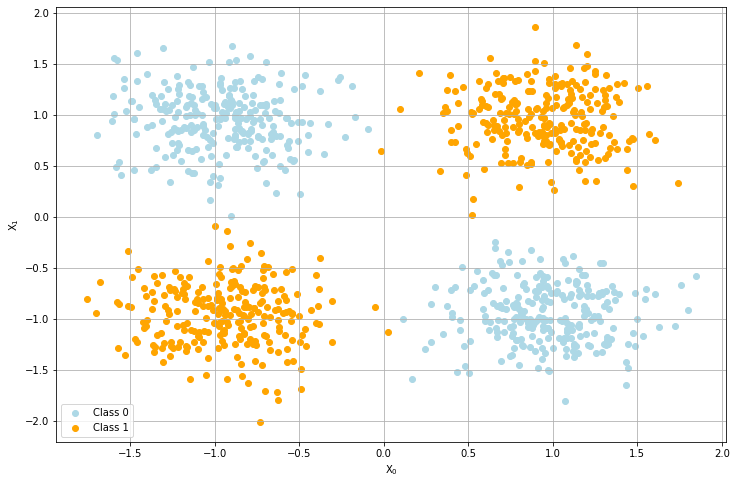

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

## setting the seed 
np.random.seed(805)

numb_samples = 1000
numb_obs = int(numb_samples / 4)

## Defining X and Y 
X = np.zeros((numb_samples, 2))
Y = np.zeros((numb_samples, ))

X[0:numb_obs, :] = np.random.multivariate_normal([1.0, -1.0], np.diag([0.1, 0.1]), size = numb_obs)
Y[0:numb_obs] = 0

X[numb_obs:(2*numb_obs), :] = np.random.multivariate_normal([1.0, 1.0], np.diag([0.1, 0.1]), size = numb_obs)
Y[numb_obs:(2*numb_obs)] = 1

X[(2*numb_obs):(3*numb_obs), :] = np.random.multivariate_normal([-1.0, 1.0], np.diag([0.1, 0.1]), size = numb_obs)
Y[(2*numb_obs):(3*numb_obs)] = 0

X[(3*numb_obs):, :] = np.random.multivariate_normal([-1.0, -1.0], np.diag([0.1, 0.1]), size = numb_obs)
Y[(3*numb_obs):] = 1

## Standardizing X
scaler = StandardScaler()
X = scaler.fit_transform(X)

X, Y = shuffle(X, Y, random_state = 805)
data = pd.DataFrame({'X_0': X[:, 0], 'X_1': X[:, 1], 'Y': Y})
data['Y'] = data['Y'].astype(int)

fig = plt.figure(figsize = (12, 8))

colors = ['lightblue', 'orange']

for i in data['Y'].unique():

    temp = data[data['Y'] == i]
    plt.scatter(temp['X_0'], temp['X_1'], color = colors[i])

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.grid()
plt.legend(loc = 'lower left', labels = ['Class 0', 'Class 1'])
plt.show()

# fig.savefig('chapter5_plot1.pdf')

In [2]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

perceptron = Perceptron(penalty = 'l2', alpha = 0.1, random_state = 1205)

## Splitting data into training a testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

## Fitting perceptron on training dataset
perceptron_train = perceptron.fit(X_train, Y_train)

## Predicting on the test dataset
preds = perceptron_train.predict(X_test)

## Computing accuracy
accuracy_score(Y_test, preds)

0.485

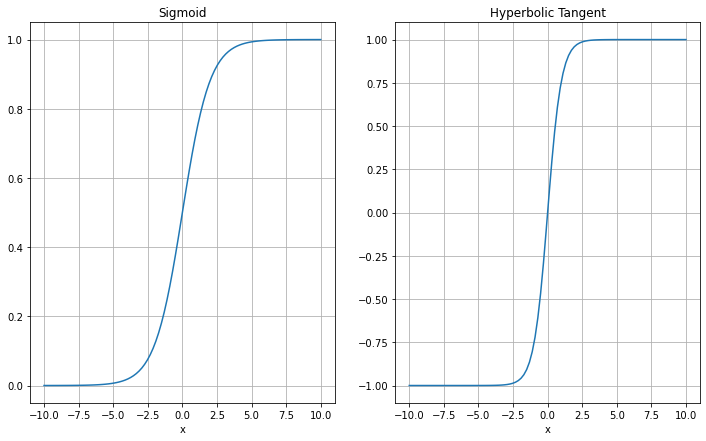

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y_sigmoid = 1 / (1 + np.exp(-x))
y_hyperbolic = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

fig, axs = plt.subplots(1, 2, figsize = (12, 7))
axs[0].plot(x, y_sigmoid)
axs[0].set_xlabel('x')
axs[0].set_title('Sigmoid')
axs[0].grid()

axs[1].plot(x, y_hyperbolic)
axs[1].set_xlabel('x')
axs[1].set_title('Hyperbolic Tangent')
axs[1].grid()

fig.savefig('chapter5_plot2.pdf')

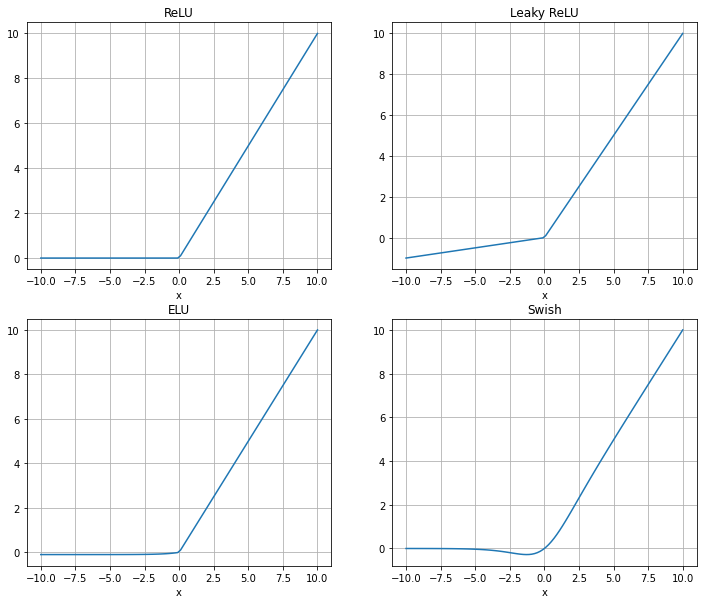

In [23]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.1
x = np.linspace(-10, 10, 100)
y_relu = np.where(x < 0, 0, x)
y_leakyrelu = np.where(x > 0, x, alpha*x)
y_elu = np.where(x > 0, x, alpha*(np.exp(x) - 1))
y_swish = x / (1 + np.exp(-x))

fig, axs = plt.subplots(2, 2, figsize = (12, 10))
axs[0, 0].plot(x, y_relu)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_title('ReLU')
axs[0, 0].grid()

axs[0, 1].plot(x, y_leakyrelu)
axs[0, 1].set_xlabel('x')
axs[0, 1].set_title('Leaky ReLU')
axs[0, 1].grid()

axs[1, 0].plot(x, y_elu)
axs[1, 0].set_xlabel('x')
axs[1, 0].set_title('ELU')
axs[1, 0].grid()

axs[1, 1].plot(x, y_swish)
axs[1, 1].set_xlabel('x')
axs[1, 1].set_title('Swish')
axs[1, 1].grid()

# fig.savefig('chapter5_plot3.pdf')